<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/heart.csv')

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
print(f'null values \n {"--" * 7} \n {data.isnull().sum()}')
print(f'\n null values sum \n {"--" * 7} \n {data.isnull().sum().sum()}')

null values 
 -------------- 
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 null values sum 
 -------------- 
 0


In [16]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

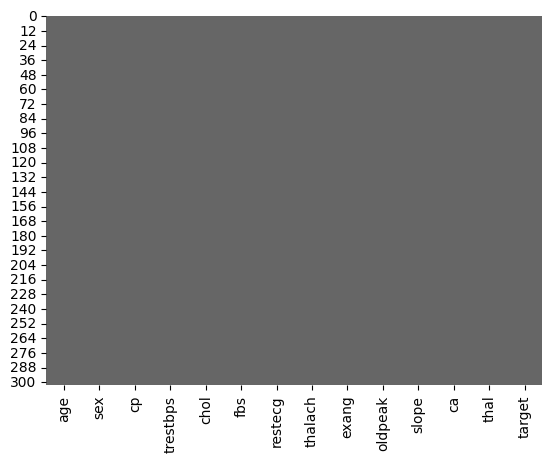

In [21]:
import seaborn as sns
sns.heatmap(data.isnull(),cbar=False,cmap='Dark2_r')

<Axes: xlabel='target', ylabel='count'>

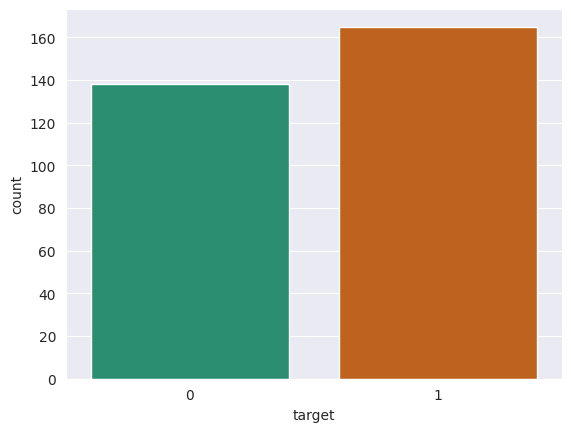

In [26]:
sns.countplot(x='target', data=data, palette='Dark2')

train and test split

In [24]:
X = data.drop('target', axis=1)
y = data['target']

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
from sklearn import svm
from sklearn.metrics import accuracy_score
linear_clf = svm.SVC(kernel='linear')
linear_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
linear_pred = linear_clf.predict(X_test)
linear_acc = accuracy_score(y_test, linear_pred)
print('Linear Accuracy:', linear_acc)

Linear Accuracy: 0.8688524590163934


In [34]:
rbf_clf = svm.SVC(kernel='rbf')
rbf_clf.fit(X_train, y_train)

SVC()

In [35]:
rbf_pred = rbf_clf.predict(X_test)
rbf_acc = accuracy_score(y_test, rbf_pred)
print('RBF Accuracy:', rbf_acc)

RBF Accuracy: 0.7049180327868853


#Decision Tree classifier

In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5733173076923077, 0.95, 'x[2] <= 0.5\ngini = 0.495\nsamples = 242\nvalue = [109, 133]'),
 Text(0.31490384615384615, 0.85, 'x[11] <= 0.5\ngini = 0.413\nsamples = 110\nvalue = [78, 32]'),
 Text(0.4441105769230769, 0.8999999999999999, 'True  '),
 Text(0.1875, 0.75, 'x[8] <= 0.5\ngini = 0.498\nsamples = 53\nvalue = [25, 28]'),
 Text(0.07692307692307693, 0.65, 'x[12] <= 2.5\ngini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.038461538461538464, 0.55, 'x[4] <= 316.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.019230769230769232, 0.45, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.057692307692307696, 0.45, 'x[10] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.038461538461538464, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07692307692307693, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11538461538461539, 0.55, 'x[6] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.09615384615384616, 0.45, 'gini = 0.0\nsamples = 3

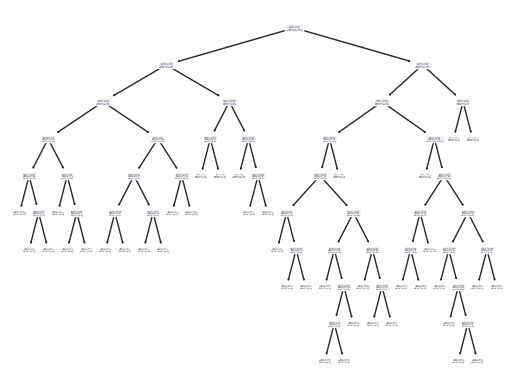

In [40]:
tree.plot_tree(dtc)

In [37]:
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
print('Decision Tree Accuracy:', dtc_acc)

Decision Tree Accuracy: 0.8032786885245902


#Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
print('Random Forest Accuracy:', rfc_acc)

Random Forest Accuracy: 0.8360655737704918


#Logistic Regression,

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [44]:
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic Regression Accuracy:', lr_acc)

Logistic Regression Accuracy: 0.8852459016393442


#Naïve Bayes classifier

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [46]:
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print('Naive Bayes Accuracy:', nb_acc)

Naive Bayes Accuracy: 0.8688524590163934


#KNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print('KNN Accuracy:', knn_acc)

KNN Accuracy: 0.6885245901639344


In [51]:
print('Linear Accuracy:', linear_acc)
print('RBF Accuracy:', rbf_acc)
print('Decision Tree Accuracy:', dtc_acc)
print('Random Forest Accuracy:', rfc_acc)
print('Logistic Regression Accuracy:', lr_acc)
print('Naive Bayes Accuracy:', nb_acc)
print('KNN Accuracy:', knn_acc)

Linear Accuracy: 0.8688524590163934
RBF Accuracy: 0.7049180327868853
Decision Tree Accuracy: 0.8032786885245902
Random Forest Accuracy: 0.8360655737704918
Logistic Regression Accuracy: 0.8852459016393442
Naive Bayes Accuracy: 0.8688524590163934
KNN Accuracy: 0.6885245901639344


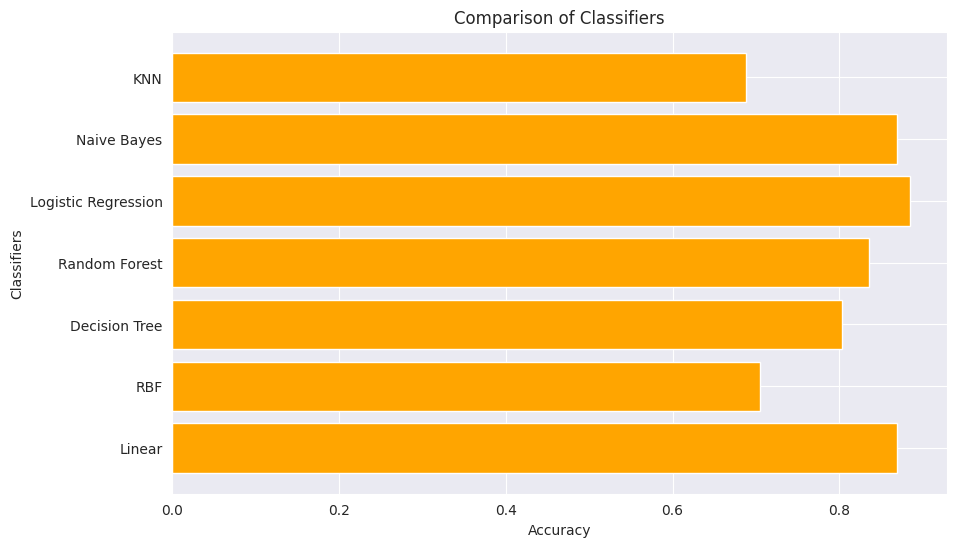

In [55]:
plt.figure(figsize=(10, 6))
plt.barh(['Linear', 'RBF', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Naive Bayes', 'KNN'],
        [linear_acc, rbf_acc, dtc_acc, rfc_acc, lr_acc, nb_acc, knn_acc], color='orange'q )
plt.xlabel('Accuracy')
plt.ylabel('Classifiers')
plt.title('Comparison of Classifiers')
plt.show()

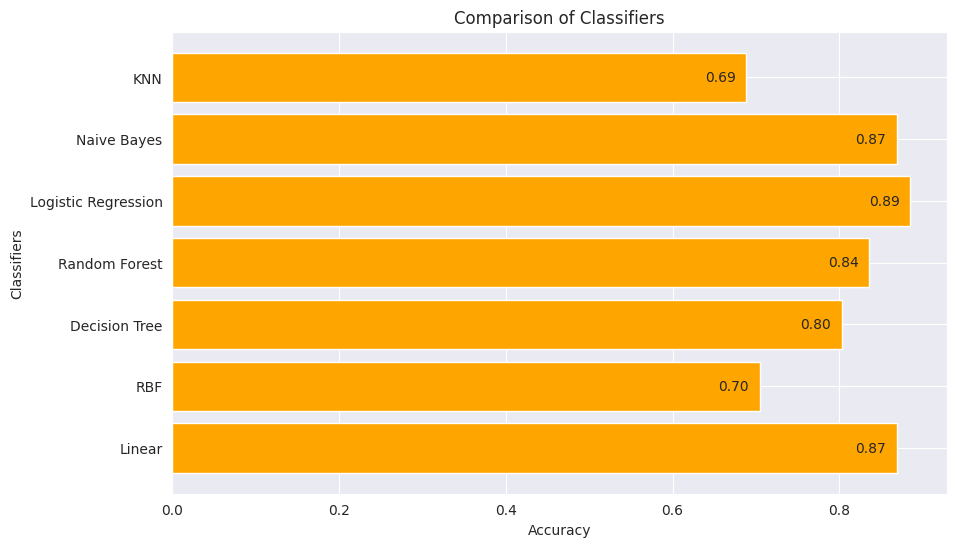

In [76]:
import matplotlib.pyplot as plt

# Classifier names and their accuracies
classifiers = ['Linear', 'RBF', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Naive Bayes', 'KNN']
accuracies = [linear_acc, rbf_acc, dtc_acc, rfc_acc, lr_acc, nb_acc, knn_acc]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracies, color='orange')

# Add values on the bars
for bar in bars:
    plt.annotate(f'{bar.get_width():.2f}',  # Format the number to 2 decimal places
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),  # Position at the center of the bar
                 xytext=(-30, 0),  # Offset for better visibility
                 textcoords="offset points",
                 ha='left', va='center', fontsize=10)

# Label and title
plt.xlabel("Accuracy")
plt.ylabel("Classifiers")
plt.title("Comparison of Classifiers")
plt.show()
